In [65]:
## importing libraries ##
import pandas as pd  # data science essentials
import numpy as np   
import warnings 
import phik  
warnings.filterwarnings('ignore', category=FutureWarning)
import matplotlib.pyplot as plt  # basic data visualization
import seaborn as sns            # enhanced data visualization
import statsmodels.formula.api as smf  # statistical models including linear regression
import sklearn.linear_model  # contains linear modeling algorithms
from sklearn.model_selection import train_test_split  # splitting data into train and test sets
from sklearn.model_selection import GridSearchCV  # hyperparameter optimization
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # feature scaling and encoding categorical variables
from sklearn.impute import SimpleImputer  # handling missing values
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  # various linear models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor #  KNeighbors for regression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  # random forest for classification
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score  # metrics for regression model evaluation
from math import sqrt  # additional math functions, used here for square root calculation
from sklearn.model_selection import RandomizedSearchCV

# setting pandas print options (optional)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## importing data ##

# reading modeling data into Python
modeling_data = "C:\\Users\\lones\\Desktop\\predicting-birthweight-fy-spring-2024\\birthweight.csv"

# calling this df_train
birthw = pd.read_csv(modeling_data,
                         header     = 0,
                         index_col  = 'bwt_id')



# reading testing data into Python
testing_data = "C:\\Users\\lones\\Desktop\\predicting-birthweight-fy-spring-2024\\birthweight_test_data.csv"


# calling this df_test
test_birthw = pd.read_csv(testing_data,
                        header     = 0,
                        index_col  = 'bwt_id')

In [ ]:
# Dropping specific features from the training dataset
birthw = birthw.drop(labels=['fmaps', 'fwhte', 'fblck', 'foth'], axis=1)

# Dropping the same features from the testing dataset
test_birthw = test_birthw.drop(labels=['fmaps', 'fwhte', 'fblck', 'foth'], axis=1)

In [63]:
# Checking the columns of the training dataset to confirm
birthw.head()

# Checking the columns of the testing dataset to confirm
test_birthw.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth
bwt_id,,,,,,,,,,,,,,,,,
bwt_14,30,16.0,5,10.0,38,16.0,9,9,0.0,0.0,1,1,0,0,1,0,0
bwt_16,29,12.0,1,9.0,28,12.0,9,10,0.0,0.0,0,1,0,0,1,0,0
bwt_24,28,16.0,1,12.0,30,16.0,8,9,0.0,0.0,1,1,0,0,1,0,0
bwt_30,30,12.0,1,12.0,28,12.0,9,9,0.0,0.0,0,1,0,0,1,0,0
bwt_57,37,17.0,3,12.0,36,16.0,9,9,0.0,0.0,0,1,0,0,1,0,0


In [82]:
# Check for missing values in the training dataset
missing_values_train = birthw.isnull().sum()
print("Missing values in training dataset:")
print(missing_values_train[missing_values_train > 0])  # Print only columns with missing values

# Check for missing values in the testing dataset
missing_values_test = test_birthw.isnull().sum()
print("\nMissing values in testing dataset:")
print(missing_values_test[missing_values_test > 0])  # Print only columns with missing values

Missing values in training dataset:
meduc           5
npvis          18
fage            1
feduc           8
omaps           2
fmaps           2
cigs           28
drink          27
peduc           9
page_diff       1
smoke_drink    29
dtype: int64

Missing values in testing dataset:
meduc          1
npvis          3
feduc          2
cigs           5
drink          5
peduc          2
smoke_drink    5
dtype: int64


In [83]:
# For training data
# Calculate the mean value for each column in the training dataset
train_means = birthw.mean()

# Fill missing values in the training dataset with the corresponding mean values
birthw = birthw.fillna(train_means)

# For testing data
# Fill missing values in the testing dataset with the mean values from the training dataset
test_birthw = test_birthw.fillna(train_means)

In [84]:
# Check for missing values in the training dataset
missing_values_train = birthw.isnull().sum()
print("Missing values in training dataset:")
print(missing_values_train[missing_values_train > 0])  

# Check for missing values in the testing dataset
missing_values_test = test_birthw.isnull().sum()
print("\nMissing values in testing dataset:")
print(missing_values_test[missing_values_test > 0])  

Missing values in training dataset:
Series([], dtype: int64)

Missing values in testing dataset:
Series([], dtype: int64)


In [85]:
# Checking descriptive statistics
birthw.describe()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght,peduc,page_diff,smoke_drink,low_bwght
count,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000,409.000000
mean,29.850856,13.655941,2.220049,11.565217,32.240196,13.902743,8.196560,8.953317,1.194226,0.023560,0.488998,0.872861,0.073350,0.053790,0.875306,0.073350,0.051345,3189.870416,27.557500,3.487745,0.368421,0.195599
std,5.126321,2.143833,1.334126,3.803406,6.127818,2.215812,1.409244,0.581818,4.116451,0.308332,0.500491,0.333537,0.261029,0.225879,0.330777,0.261029,0.220970,748.450059,3.850986,3.596001,5.981676,0.397147
min,16.000000,3.000000,0.000000,0.000000,18.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000,12.000000,0.000000,0.000000,0.000000
25%,27.000000,12.000000,1.000000,10.000000,28.000000,12.000000,8.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2780.000000,24.000000,1.000000,0.000000,0.000000
50%,30.000000,13.655941,2.000000,12.000000,32.000000,14.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3340.000000,28.000000,2.000000,0.000000,0.000000
75%,33.000000,16.000000,3.000000,12.000000,36.000000,16.000000,9.000000,9.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3686.000000,32.000000,5.000000,0.000000,0.000000
max,44.000000,17.000000,8.000000,36.000000,62.000000,17.000000,10.000000,10.000000,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5089.000000,34.000000,27.000000,120.000000,1.000000


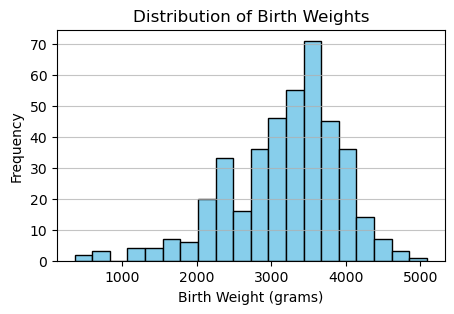

In [13]:
# Distribution of birth weights
plt.figure(figsize=(5, 3))
plt.hist(birthw['bwght'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Weights')
plt.xlabel('Birth Weight (grams)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The graph is a histogram that shows the distribution of birth weights in my dataset. The x-axis represents different birth weight categories in grams, and the y-axis shows the frequency of occurrences within each category. The distribution looks approximately normal, centered around the 3000 to 3500-gram range, which is the most common range for birth weights. There are fewer instances towards the extremes, with very low birth weights near 1000 grams and higher birth weights approaching 5000 grams being less frequent. This kind of distribution is typical for birth weights, where most fall within a normal range and fewer are observed at the lower and higher ends.

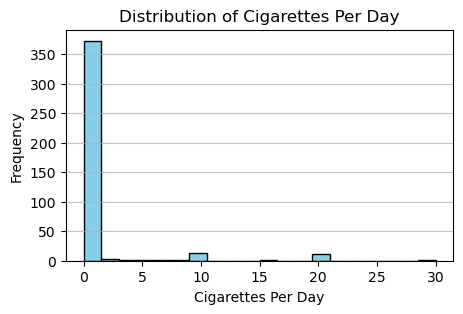

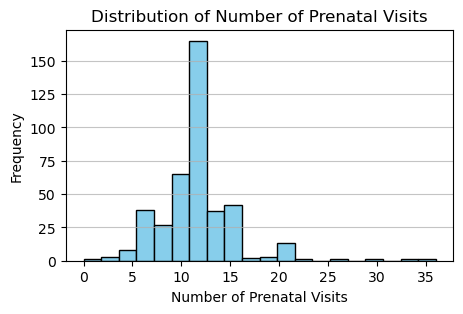

In [14]:
# Histogram for average cigarettes per day 
plt.figure(figsize=(5, 3))
plt.hist(birthw['cigs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Cigarettes Per Day')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Histogram for total prenatal visits
plt.figure(figsize=(5, 3))
plt.hist(birthw['npvis'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Prenatal Visits')
plt.xlabel('Number of Prenatal Visits')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

The first histogram shows the distribution of cigarettes smoked per day by individuals in my dataset. Most people do not smoke, as indicated by the high frequency at 0 cigarettes per day. The frequency decreases sharply as the number of cigarettes increases, suggesting that fewer individuals smoke more cigarettes.

The second histogram displays the distribution of the number of prenatal visits. The most common number of visits is clustered around 10 to 15, as shown by the peak in that range. The distribution is somewhat left-skewed, indicating that fewer prenatal visits are less common than the mode in my dataset.

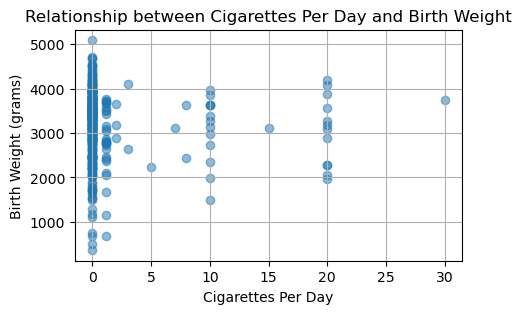

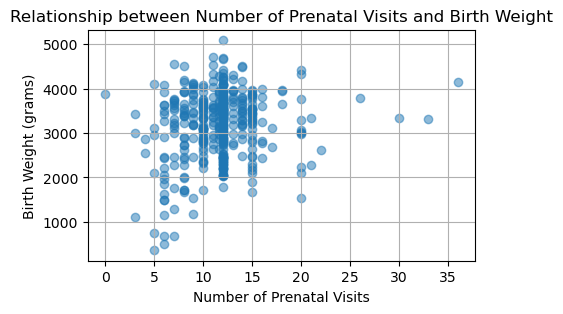

In [16]:
# Scatter plot for 'cigs' and 'bwght'
plt.figure(figsize=(5, 3))
plt.scatter(birthw['cigs'], birthw['bwght'], alpha=0.5)
plt.title('Relationship between Cigarettes Per Day and Birth Weight')
plt.xlabel('Cigarettes Per Day')
plt.ylabel('Birth Weight (grams)')
plt.grid(True)
plt.show()

# Scatter plot for 'npvis' and 'bwght'
plt.figure(figsize=(5, 3))
plt.scatter(birthw['npvis'], birthw['bwght'], alpha=0.5)
plt.title('Relationship between Number of Prenatal Visits and Birth Weight')
plt.xlabel('Number of Prenatal Visits')
plt.ylabel('Birth Weight (grams)')
plt.grid(True)
plt.show()

The first scatter plot displays the relationship between the number of cigarettes smoked per day and birth weight in my dataset. It appears that as the number of cigarettes increases, birth weight shows a slight tendency to decrease, although the relationship does not seem very strong. Most of the data points are clustered at 0 cigarettes per day, indicating most individuals reported not smoking, and these birth weights vary across the spectrum.

The second scatter plot illustrates the relationship between the number of prenatal visits and birth weight. This plot doesn't show a clear trend or pattern, indicating that the number of prenatal visits does not have a straightforward or strong linear relationship with birth weight. There is a wide distribution of birth weights across the different numbers of prenatal visits. However, there's a concentration of visits around 10 to 15, which corresponds to a range of birth weights. 

            mage     meduc    monpre     npvis      fage     feduc     omaps      cigs     drink      male     mwhte     mblck      moth     bwght
mage    1.000000  0.311206 -0.238884  0.151079  0.703521  0.273333  0.086438 -0.084526  0.036473  0.009389  0.076325 -0.107199  0.011179  0.054616
meduc   0.311206  1.000000 -0.224816  0.056785  0.256548  0.564226  0.127878 -0.176605  0.007594  0.029193 -0.003054 -0.134366  0.159786  0.001269
monpre -0.238884 -0.224816  1.000000 -0.151754 -0.149427 -0.321714 -0.138038  0.125306  0.003556 -0.003707 -0.107724  0.143567 -0.006841  0.055095
npvis   0.151079  0.056785 -0.151754  1.000000  0.091086  0.110400  0.215013 -0.172618 -0.012538 -0.066338  0.056786 -0.081362  0.010171  0.178947
fage    0.703521  0.256548 -0.149427  0.091086  1.000000  0.201999  0.082097 -0.072239  0.051467  0.034333 -0.022197 -0.034026  0.072098  0.138564
feduc   0.273333  0.564226 -0.321714  0.110400  0.201999  1.000000  0.113210 -0.166617 -0.041508  0.026659  0.016714 -

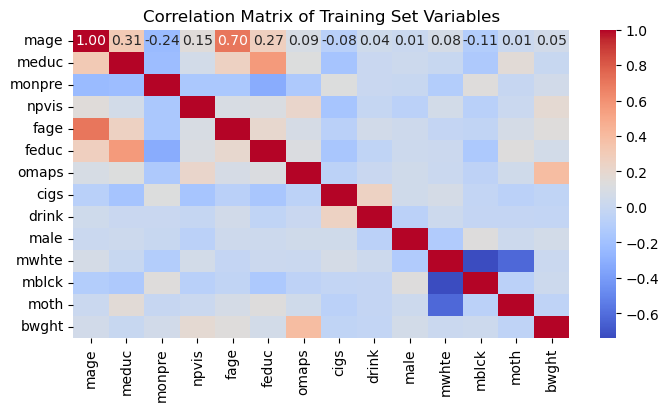

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your training data is in a DataFrame called `birthw`
# Calculate the correlation matrix
correlation_matrix = birthw.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Training Set Variables')
plt.show()


The strongest positive correlation with birthweight in my dataset is from the one-minute Apgar score (omaps), which suggests it might be a significant predictor of birthweight. Other factors exhibit weaker positive relationships with birthweight. While smoking and drinking during pregnancy negatively correlate with birthweight in my data, these correlations are not particularly strong. It's crucial to remember that correlation does not necessarily imply causation, and these observed relationships could be affected by various confounding factors.

Feature Engineering

The new features engineered below will provide additional information that may be relevant for predicting birth weight or understanding the factors affecting it. 1.Total Parental Education (peduc): This feature could represent the combined educational level of both parents. You can simply sum up the education years of both the mother (meduc) and the father (feduc). 2.Parental Age Difference (page_diff): This feature could indicate the age difference between the mother and father. It could provide insight into the parental dynamics and its potential impact on birth weight. 3.Maternal Smoking and Drinking Behavior (smoke_drink): This feature could combine information about maternal smoking and drinking habits into a single feature. It could help capture the overall lifestyle choices of the mother during pregnancy.

In [71]:
# For the training dataset
birthw['peduc'] = birthw['meduc'] + birthw['feduc']
birthw['page_diff'] = abs(birthw['mage'] - birthw['fage'])
birthw['smoke_drink'] = birthw['cigs'] * birthw['drink']  # Assuming multiplication captures the combined effect

# For the testing dataset
test_birthw['peduc'] = test_birthw['meduc'] + test_birthw['feduc']
test_birthw['page_diff'] = abs(test_birthw['mage'] - test_birthw['fage'])
test_birthw['smoke_drink'] = test_birthw['cigs'] * test_birthw['drink']  # Assuming multiplication captures the combined effect

# Display the first few rows to verify the new features in the training dataset
birthw.head()

# Display the first few rows to verify the new features in the testing dataset
test_birthw.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,peduc,page_diff,smoke_drink
bwt_id,,,,,,,,,,,,,,,,,,,,
bwt_14,30,16.0,5,10.0,38,16.0,9,9,0.0,0.0,1,1,0,0,1,0,0,32.0,8,0.0
bwt_16,29,12.0,1,9.0,28,12.0,9,10,0.0,0.0,0,1,0,0,1,0,0,24.0,1,0.0
bwt_24,28,16.0,1,12.0,30,16.0,8,9,0.0,0.0,1,1,0,0,1,0,0,32.0,2,0.0
bwt_30,30,12.0,1,12.0,28,12.0,9,9,0.0,0.0,0,1,0,0,1,0,0,24.0,2,0.0
bwt_57,37,17.0,3,12.0,36,16.0,9,9,0.0,0.0,0,1,0,0,1,0,0,33.0,1,0.0


Determinants of Low Birth Weight
The ratio of newborns with a weight under 2500 grams signals multiple public health issues, including chronic undernutrition in mothers, general health concerns, and deficiencies in prenatal care. Recognized as a key measure by the Global Nutrition Monitoring Framework and featured in WHO's core list of health indicators, low birth weight is a critical factor in gauging infant health and can stem from preterm delivery or inadequate fetal growth. Risk factors for having a low birth weight baby include lifestyle factors like substance use, extremes of maternal age, and health and pregnancy history.

In [86]:
# Creating new variable low_bwght

# For the training dataset
birthw['low_bwght'] = (birthw['bwght'] < 2500).astype(int)

In [87]:
# Check columns in the training dataset
print(birthw.columns)

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'bwght', 'peduc', 'page_diff', 'smoke_drink', 'low_bwght'], dtype='object')


In [88]:
# Determine continuous features (numerical: int64 or float64) by looking at the unique values

continuous_features = [column for column in birthw.columns if 
                       (birthw[column].dtype == 'float64' or birthw[column].dtype == 'int64') 
                       and birthw[column].nunique() > 10]

categorical_features = [column for column in birthw.columns if
                        birthw[column].nunique() <= 10 or birthw[column].dtype == 'object']

print("Continuous Features:", continuous_features)
print("Categorical Features:", categorical_features)


Continuous Features: ['mage', 'meduc', 'npvis', 'fage', 'feduc', 'omaps', 'cigs', 'bwght', 'peduc', 'page_diff']
Categorical Features: ['monpre', 'fmaps', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'smoke_drink', 'low_bwght']


In [89]:
# creating feature sets
continuous     = ['mage', 'meduc', 'npvis', 'fage', 'feduc', 'omaps', 'cigs', 'bwght', 'peduc', 'page_diff']

non_continuous = ['monpre', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'smoke_drink', 'low_bwght']


# pearson correlation
birthw_corr = birthw[ continuous ].corr(method = 'pearson').round(decimals = 4)


# phi coefficient
birthw_phi_corr = birthw[ non_continuous ].phik_matrix(interval_cols = non_continuous).round(decimals = 4)


# checking results
print(f"""
Point-Biserial Correlations
---------------------------
{birthw_corr.loc[ : , 'bwght' ].sort_values(ascending = False)}


Phi Coefficients
----------------
{birthw_phi_corr.loc[ : , 'low_bwght' ].sort_values(ascending = False)}
""")


Point-Biserial Correlations
---------------------------
bwght        1.0000
omaps        0.3927
npvis        0.1789
fage         0.1386
page_diff    0.0753
feduc        0.0597
mage         0.0546
peduc        0.0318
meduc        0.0013
cigs        -0.0396
Name: bwght, dtype: float64


Phi Coefficients
----------------
low_bwght      1.0000
monpre         0.0549
drink          0.0000
male           0.0000
mwhte          0.0000
mblck          0.0000
moth           0.0000
smoke_drink    0.0000
Name: low_bwght, dtype: float64



In [90]:
# Define the target variable and feature names
target_variable = 'low_bwght'  # Adjust this if your target column name is different
features = ['mage', 'meduc', 'npvis', 'fage', 'feduc', 'omaps', 
            'cigs', 'peduc', 'page_diff', 'smoke_drink', 
            'monpre', 'drink', 'male', 'mwhte', 'mblck', 'moth']

# Select the target and feature data from the training dataset
y_data = birthw[target_variable]
x_data = birthw[features]

# Perform the training-validation split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size=0.25,
                                                    random_state=702)

In [91]:
# Instantiate the scaler
scaler = StandardScaler()

# Instantiate and apply the scaler to the train and validation sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Prepare the separate test dataset with the same features and scaling
test_features = test_birthw[features]
test_features_scaled = scaler.transform(test_features)


In [ ]:
Developing candidate models

In [92]:
#Logistic Regression

# Naming the model
model_name = 'Logistic Regression'

# Initialize the model with an increased max_iter and specifying the solver
model = LogisticRegression(max_iter=1000)

In [49]:
# Random Forest Classifier

# Naming the model
model_name = 'Random Forest Classifier'

# Initialize the model
model = RandomForestClassifier(random_state=702)

In [51]:
# Decision Tree Classifier 

# Naming the model
model_name = 'Decision Tree Classifier'

# Initialize the model
model = DecisionTreeClassifier(random_state=702)

In [94]:
# Ridge Classifier

# Naming the model
model_name = 'Ridge Classifier'

# Initialize your model
model = RidgeClassifier()

In [55]:
# Naming the model
model_name = 'GBM Classifier'

# Initialize your model
model = GradientBoostingClassifier()

In [95]:
# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4)
model_test_score  = model.score(x_test, y_test).round(4)
model_gap         = abs(model_train_score - model_test_score).round(4)
    

# dynamically printing results
model_summary =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""

print(model_summary)

Model Name:     Ridge Classifier
Train_Score:    0.8333
Test_Score:     0.835
Train-Test Gap: 0.0017



In [ ]:
# Model Results

Model Name:     Logistic Regression
Train_Score:    0.8268
Test_Score:     0.8447
Train-Test Gap: 0.0179
    
Model Name:     Random Forest Classifier
Train_Score:    1.0
Test_Score:     0.8641
Train-Test Gap: 0.1359

Model Name:     Decision Tree Classifier
Train_Score:    1.0
Test_Score:     0.6602
Train-Test Gap: 0.3398
    
Model Name:     Ridge Classifier
Train_Score:    0.8333
Test_Score:     0.835
Train-Test Gap: 0.0017
    
Model Name:     GBM Classifier
Train_Score:    0.9248
Test_Score:     0.8447
Train-Test Gap: 0.0801

Summary and Recommendation
The Ridge Classifier and Logistic Regression models show the best generalization ability with the smallest gaps between training and test scores.
The Random Forest and GBM Classifiers demonstrate higher performance on the training set, with Random Forest showing potential overfitting.
The Decision Tree Classifier exhibits the most overfitting and lowest test performance and may need further tuning or complexity reduction.
Given these results, the Ridge Classifier seems to be a strong candidate due to its stability and generalization. 

In [102]:
from scipy.stats import loguniform

# Adjust the parameter distribution based on previous tuning results
# For example, if previous best alpha was around 1, you might want to search around that value more finely
ridge_param_grid = {
    'alpha': loguniform(1e-2, 1e+2)  # Adjust the range based on previous outcomes
}

# Increase the number of iterations to explore more combinations
# and potentially use more detailed cross-validation
ridge_cv = RandomizedSearchCV(estimator=ridge_model,
                              param_distributions=ridge_param_grid,
                              n_iter=200,  # More iterations
                              cv=10,  # More cross-validation splits
                              scoring='roc_auc',
                              random_state=702,
                              verbose=1)

ridge_cv.fit(X_train_scaled, y_train)

print("Tuned Parameters for Ridge Classifier:", ridge_cv.best_params_)
print("Tuned Training AUC for Ridge Classifier:", ridge_cv.best_score_.round(5))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Tuned Parameters for Ridge Classifier: {'alpha': 1.7572232123078126}
Tuned Training AUC for Ridge Classifier: 0.69387


In [104]:
from sklearn.linear_model import LogisticRegression

# Assuming you have found the best parameters for Logistic Regression, e.g., 
# {'C': 0.04198435174652031, 'penalty': 'l1', 'solver': 'liblinear'}
best_params = {'C': 0.04198435174652031, 'penalty': 'l1', 'solver': 'liblinear'}

# Naming the model
model_name = 'Tuned Logistic Regression'

# Instantiating a Logistic Regression model with tuned values
model = LogisticRegression(C=best_params['C'], 
                           penalty=best_params['penalty'], 
                           solver=best_params['solver'], 
                           random_state=702)

# Fitting to the training data
model.fit(X_train_scaled, y_train)  # Assuming your data is scaled appropriately

# Predicting based on the testing set
predictions = model.predict(X_test_scaled)  # Assuming you have scaled X_test as well

# Scoring results
model_train_score = model.score(X_train_scaled, y_train).round(4)
model_test_score = model.score(X_test_scaled, y_test).round(4)
model_gap = abs(model_train_score - model_test_score).round(4)

# Displaying results
print(f'Model Name    : {model_name}')
print(f'Training Score: {model_train_score}')
print(f'Testing Score : {model_test_score}')
print(f'Train-Test Gap: {model_gap}')


Model Name    : Tuned Logistic Regression
Training Score: 0.817
Testing Score : 0.8544
Train-Test Gap: 0.0374


In [106]:
# Create a DataFrame for submission using the index of test_birthw as bwt_id
submission_df = pd.DataFrame({
    'bwt_id': test_birthw.index,
    'low_bwght': predictions
})

# Save the submission DataFrame to a CSV file
submission_file_path = 'submission2.csv'  # Define your file path and name
submission_df.to_csv(submission_file_path, index=False)

print(f'Submission file saved to {submission_file_path}')

ValueError: All arrays must be of the same length

Reference 
World Health Organization. (n.d.). Low birth weight. Retrieved [4/5/2024], from https://www.who.int/data/nutrition/nlis/info/low-birth-weight